---
title: 타이타닉 생존자 예측
---

In [1]:
import numpy as np
import pandas as pd 

In [2]:
train = pd.read_csv("data/titanic_train.csv")
test = pd.read_csv("data/titanic_test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
train["Age"]=train["Age"].fillna(train["Age"].median())
test["Age"]=test["Age"].fillna(test["Age"].median())
test["Fare"]=test["Fare"].fillna(test["Fare"].median())
train["Embarked"]=train["Embarked"].fillna("S")

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [7]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

C:\Users\sigma\AppData\Local\Temp\ipykernel_19968\97970295.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["Sex"][train["Sex"] == "male"] = 0
C:\Users\sigma\AppData\Local\Temp\ipykernel_19968\97970295.py:1: SettingWithCopyWarning: 

In [8]:
train["Embarked"][train["Embarked"]== "S"] = 0
train["Embarked"][train["Embarked"]== "C"] =1
train["Embarked"][train["Embarked"]== "Q"] =2
test["Embarked"][test["Embarked"]== "S"] = 0
test["Embarked"][test["Embarked"]== "C"] =1
test["Embarked"][test["Embarked"]== "Q"] =2

C:\Users\sigma\AppData\Local\Temp\ipykernel_19968\1241293558.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["Embarked"][train["Embarked"]== "S"] = 0
C:\Users\sigma\AppData\Local\Temp\ipykernel_19968\1241293558.py:1: SettingWithCop

In [9]:
y = train.loc[:,["Survived"]]
x = train.loc[:,["Sex","Age","Pclass","SibSp","Fare","Embarked"]]
print(x,y)

    Sex   Age  Pclass  SibSp     Fare Embarked
0     0  22.0       3      1   7.2500        0
1     1  38.0       1      1  71.2833        1
2     1  26.0       3      0   7.9250        0
3     1  35.0       1      1  53.1000        0
4     0  35.0       3      0   8.0500        0
..   ..   ...     ...    ...      ...      ...
886   0  27.0       2      0  13.0000        0
887   1  19.0       1      0  30.0000        0
888   1  28.0       3      1  23.4500        0
889   0  26.0       1      0  30.0000        1
890   0  32.0       3      0   7.7500        2

[891 rows x 6 columns]      Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=0)
print(x_train,y_train)
print(x_test,y_test)

    Sex   Age  Pclass  SibSp     Fare Embarked
857   0  51.0       1      0  26.5500        0
52    1  49.0       1      1  76.7292        1
386   0   1.0       3      5  46.9000        0
124   0  54.0       1      0  77.2875        0
578   1  28.0       3      1  14.4583        1
..   ..   ...     ...    ...      ...      ...
835   1  39.0       1      1  83.1583        1
192   1  19.0       3      1   7.8542        0
629   0  28.0       3      0   7.7333        2
559   1  36.0       3      1  17.4000        0
684   0  60.0       2      1  39.0000        0

[623 rows x 6 columns]      Survived
857         1
52          1
386         0
124         0
578         0
..        ...
835         1
192         1
629         0
559         1
684         0

[623 rows x 1 columns]
    Sex   Age  Pclass  SibSp      Fare Embarked
495   0  28.0       3      0   14.4583        1
648   0  28.0       3      0    7.5500        0
278   0   7.0       3      4   29.1250        2
31    1  28.0       1      1

In [11]:
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

In [12]:
params = {"objective": ["binary:logistic"],
          "n_estimators":[50000],
          "booster":["gbtree"],
          "eta":[0.01],
          "max_depth": [0,1,2,3,4,5,6,7,8,9,10],
          "min_child_weight":[0,1,2,3,4,5,6,7,8,9,10],
          "random_state":[0],
          "colsample_bytree":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          "subsample":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          "alpha":[0,1,2,3,4,5],
          "lambda":[0,1,2,3,4,5]}

In [13]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
clf = xgb.XGBClassifier()
clf_grid = RandomizedSearchCV(clf,params,cv=5,n_iter=50,random_state=0,scoring="accuracy")

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
clf_grid.fit(x_train,y_train,
        early_stopping_rounds=50,
        eval_set = [(x_test,y_test)],
        eval_metric = "error",
        verbose = 0)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'booster': ['gbtree'],
                                        'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'eta': [0.01],
                                        'lambda': [0, 1, 2, 3, 4, 5],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'min_child_weight': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10],
                                        'n_estimators': [50000],
                                        'objective': ['binary:logistic'],
                                        'random_state': [0],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=0, scoring='accuracy')

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(clf_grid.best_params_)
print(clf_grid.best_score_)

{'subsample': 0.5, 'random_state': 0, 'objective': 'binary:logistic', 'n_estimators': 50000, 'min_child_weight': 4, 'max_depth': 10, 'lambda': 4, 'eta': 0.01, 'colsample_bytree': 0.7, 'booster': 'gbtree', 'alpha': 1}
0.7912


In [17]:
bst = clf_grid.best_estimator_
print(bst)

XGBClassifier(alpha=1, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=4,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=50000, ...)


In [18]:
pred_1 = bst.predict(x_test)
grid_score= accuracy_score(y_test,pred_1)
print(grid_score)

0.7985074626865671


In [19]:
confusion_matrix(y_test,pred_1)

array([[167,   1],
       [ 53,  47]], dtype=int64)

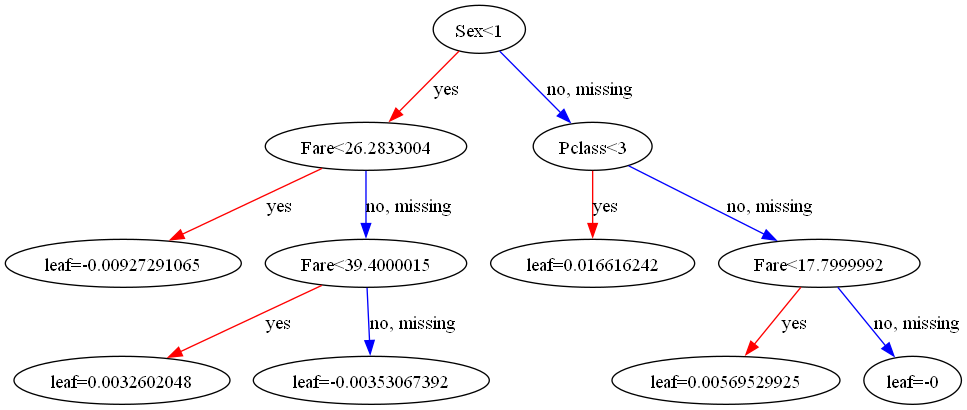

In [20]:
import graphviz
from IPython.display import Image, display_png
graph = xgb.to_graphviz(bst)
graph.format = "png"
graph.render("tree")
display_png(Image("tree.png"))

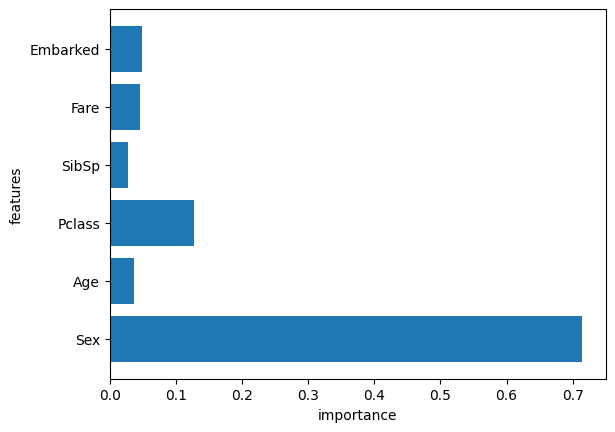

In [21]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),x)
    plt.xlabel("importance")
    plt.ylabel("features")
    plt.show
plot_feature_importances(bst)
plt.savefig("Features Importances")

In [22]:
X= test.loc[:,["Sex","Age","Pclass","SibSp","Fare","Embarked"]]
X = X.astype("float32")
Y= bst.predict(X)
Y = np.array(Y,dtype = "int64")
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]


In [23]:
PassengerId = np.array(test["PassengerId"]).astype(int)
result = pd.DataFrame(Y,PassengerId,columns = ["Survived"])
print(result)

      Survived
892          0
893          0
894          0
895          0
896          0
...        ...
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


In [24]:
result.to_csv("my_submission.csv",index_label = ["PassengerId"])
print("Your submission was successfully saved!")

Your submission was successfully saved!
